In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('J:/Data science/ML/Pyhon for ML/3.1 UNZIP_ME_FOR_NOTEBOOKS_V4/DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['signal','density']

In [5]:
df.columns

Index(['signal', 'density'], dtype='object')

<AxesSubplot:xlabel='signal', ylabel='density'>

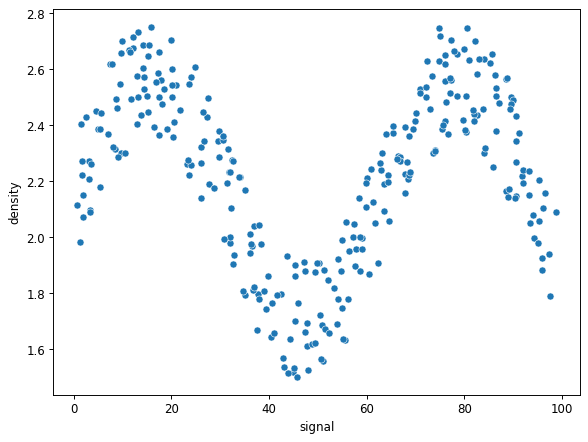

In [18]:
plt.figure(figsize=(8,6),dpi=85)
sns.scatterplot(data=df,x='signal',y='density')

In [20]:
df['signal'].shape

(300,)

In [21]:
type(df['signal'])

pandas.core.series.Series

In [22]:
x = df['signal'].values.reshape(-1,1)
y = df['density']

In [23]:
x.shape

(300, 1)

In [24]:
type(x)

numpy.ndarray

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [29]:
lr_pred = lr_model.predict(x_test)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
rmse = np.sqrt(mean_squared_error(y_test,lr_pred))
rmse

0.2570051996584629

In [32]:
sig_range = np.arange(0,100)
sig_range #x_test

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [33]:
lr_out = lr_model.predict(sig_range.reshape(-1,1))
lr_out#y_test

array([2.22028446, 2.22028673, 2.22028899, 2.22029126, 2.22029353,
       2.22029579, 2.22029806, 2.22030032, 2.22030259, 2.22030485,
       2.22030712, 2.22030938, 2.22031165, 2.22031391, 2.22031618,
       2.22031844, 2.22032071, 2.22032297, 2.22032524, 2.2203275 ,
       2.22032977, 2.22033204, 2.2203343 , 2.22033657, 2.22033883,
       2.2203411 , 2.22034336, 2.22034563, 2.22034789, 2.22035016,
       2.22035242, 2.22035469, 2.22035695, 2.22035922, 2.22036148,
       2.22036375, 2.22036602, 2.22036828, 2.22037055, 2.22037281,
       2.22037508, 2.22037734, 2.22037961, 2.22038187, 2.22038414,
       2.2203864 , 2.22038867, 2.22039093, 2.2203932 , 2.22039546,
       2.22039773, 2.22039999, 2.22040226, 2.22040453, 2.22040679,
       2.22040906, 2.22041132, 2.22041359, 2.22041585, 2.22041812,
       2.22042038, 2.22042265, 2.22042491, 2.22042718, 2.22042944,
       2.22043171, 2.22043397, 2.22043624, 2.2204385 , 2.22044077,
       2.22044304, 2.2204453 , 2.22044757, 2.22044983, 2.22045

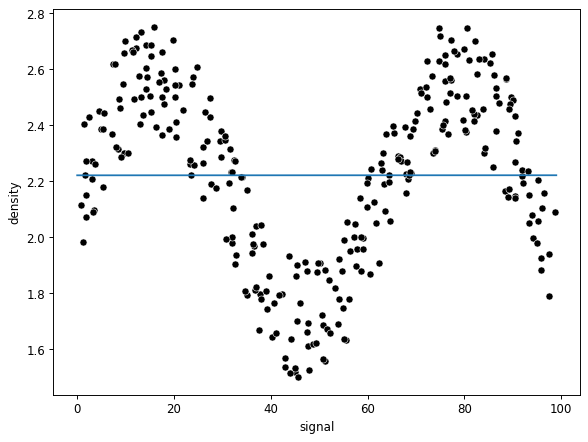

In [37]:
plt.figure(figsize=(8,6),dpi=85)
sns.scatterplot(data=df,x='signal',y='density',color='black')
plt.plot(sig_range,lr_out)

In [36]:
lr_model = LinearRegression()

In [40]:
def run_model(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    
    print(f'RMSE : {rmse}')
    
    sig_range = np.arange(0,100)
    output = model.predict(sig_range.reshape(-1,1))
    
    plt.figure(figsize=(8,6),dpi=85)
    sns.scatterplot(data=df,x='signal',y='density',color='black')
    plt.plot(sig_range,output)

RMSE : 0.2570051996584629


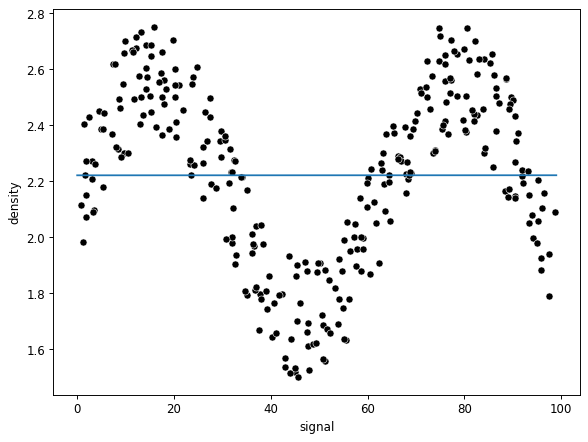

In [41]:
#x_train, x_test, y_train, y_test
run_model(lr_model,x_train,y_train,x_test,y_test)

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

RMSE : 0.28173095637255463


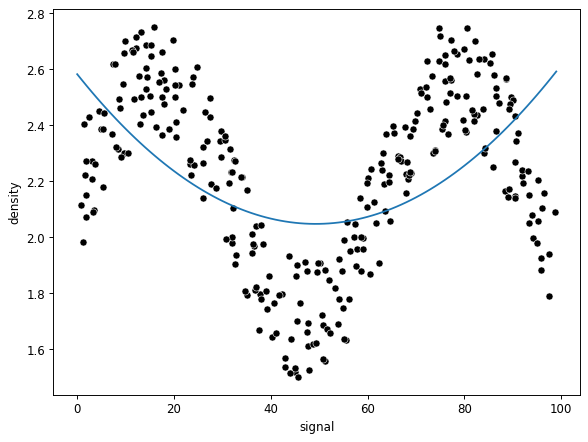

In [46]:
pip = make_pipeline(PolynomialFeatures(2),LinearRegression())
run_model(pip,x_train,y_train,x_test,y_test)

RMSE : 0.14034843686496898


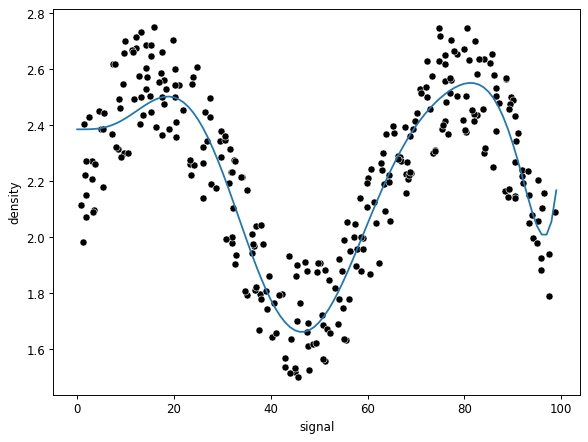

In [47]:
pip = make_pipeline(PolynomialFeatures(10),LinearRegression())
run_model(pip,x_train,y_train,x_test,y_test)

In [48]:
from sklearn.neighbors import KNeighborsRegressor

RMSE : 0.1523487028635337
RMSE : 0.13730685016923647
RMSE : 0.13277855732740926


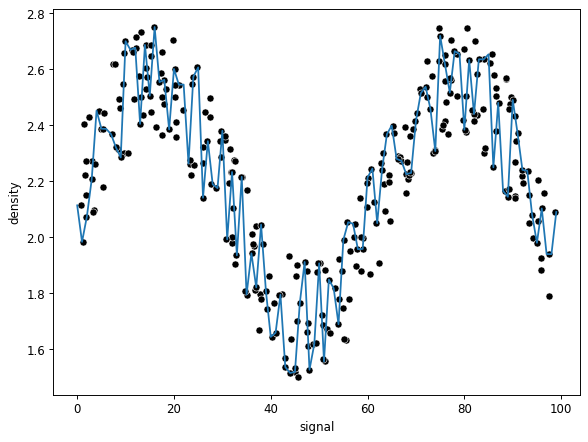

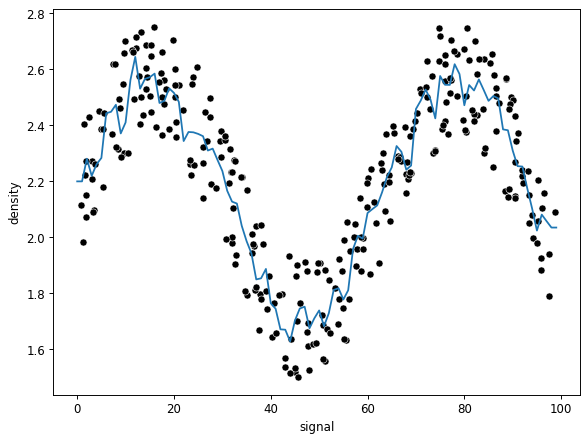

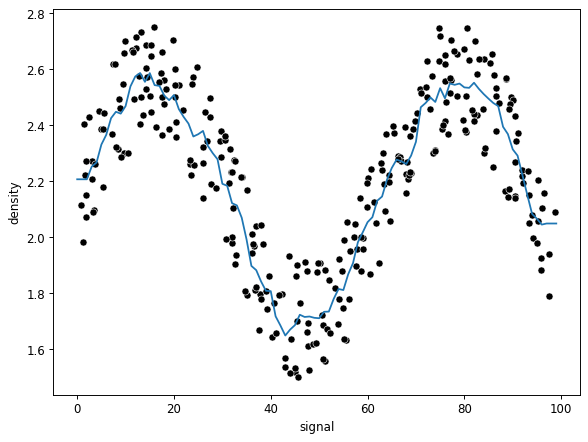

In [49]:
preds = {}
k_val = [1,5,10]
for n in k_val:
    kmodel = KNeighborsRegressor(n_neighbors=n)
    run_model(kmodel,x_train,y_train,x_test,y_test)

RMSE : 0.1523487028635337


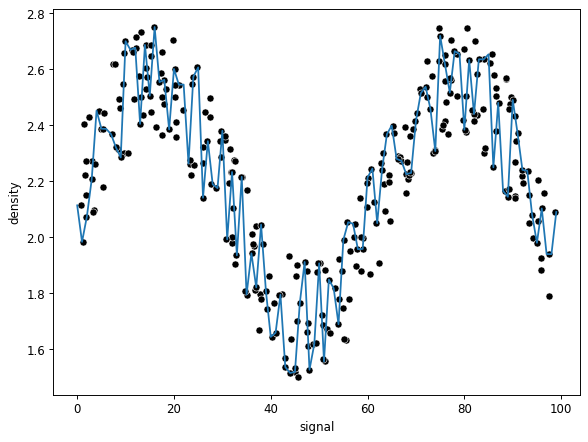

In [50]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
run_model(dtr,x_train,y_train,x_test,y_test)

RMSE : 0.12646999302046696


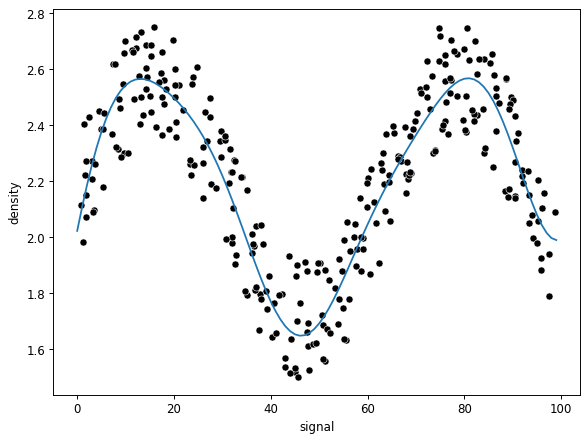

In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],
              'gamma':['auto','scale']}
svr = SVR()
grid_model = GridSearchCV(svr,param_grid)
run_model(grid_model,x_train,y_train,x_test,y_test)

In [52]:
grid_model.best_params_

{'C': 1000, 'gamma': 'scale'}

RMSE : 0.1376397927086622
RMSE : 0.13985754277483642
RMSE : 0.13331439603492765
RMSE : 0.13552503433921265


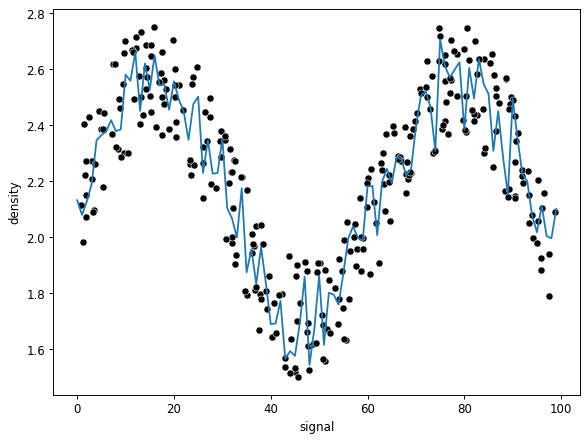

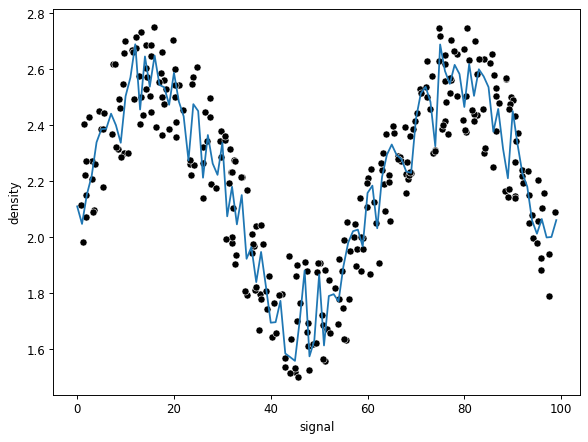

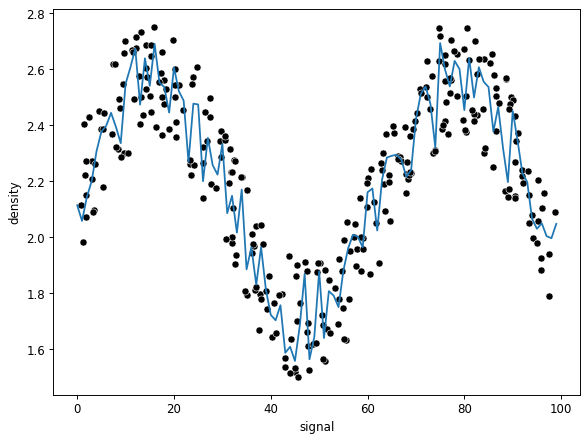

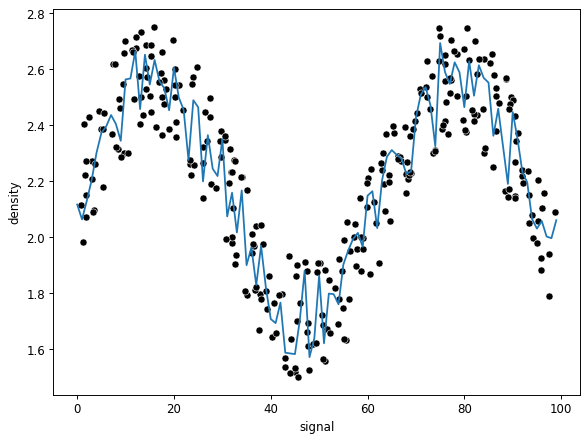

In [53]:
from sklearn.ensemble import RandomForestRegressor
trees = [10,50,100,150]
for n in trees:
    rfr = RandomForestRegressor(n_estimators=n)
    run_model(rfr,x_train,y_train,x_test,y_test)
    

In [54]:
from sklearn.ensemble import VotingRegressor
vot_model = VotingRegressor(estimators=[
                                         ('lr_model',lr_model),
                                         ('pip',pip),
                                         ('kmodel',kmodel),
                                         ('dtr',dtr),
                                         ('rfr',rfr),
                                         ('grid_model',grid_model)],
                                        )

In [55]:
vot_model.fit(x_train,y_train)

VotingRegressor(estimators=[('lr_model', LinearRegression()),
                            ('pip',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(degree=10)),
                                             ('linearregression',
                                              LinearRegression())])),
                            ('kmodel', KNeighborsRegressor(n_neighbors=10)),
                            ('dtr', DecisionTreeRegressor()),
                            ('rfr', RandomForestRegressor(n_estimators=150)),
                            ('grid_model',
                             GridSearchCV(estimator=SVR(),
                                          param_grid={'C': [0.01, 0.1, 1, 5, 10,
                                                            100, 1000],
                                                      'gamma': ['auto',
                                                                'scale']}))]

RMSE : 0.131487936620708


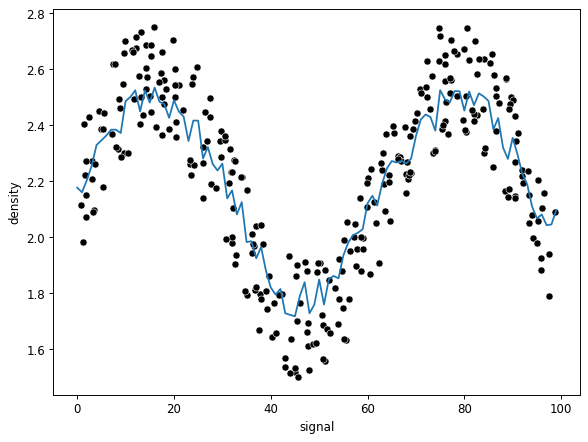

In [56]:
run_model(vot_model,x_train,y_train,x_test,y_test)

In [58]:
from sklearn.ensemble import AdaBoostRegressor

RMSE : 0.13126538066888963


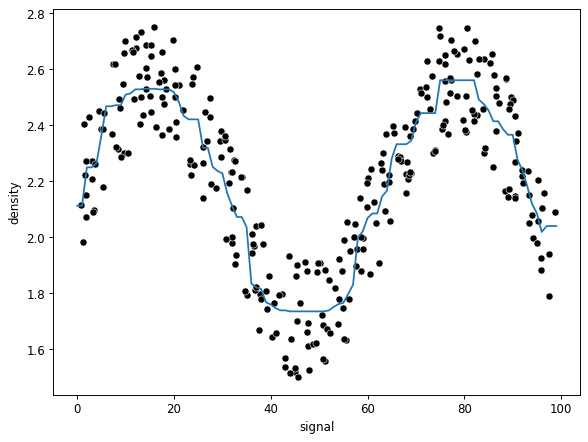

In [59]:
ada_model = AdaBoostRegressor(n_estimators=50)
run_model(ada_model,x_train,y_train,x_test,y_test)

RMSE : 0.15234206558113678


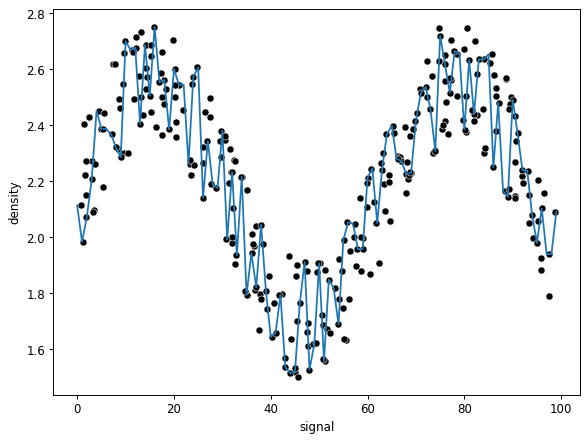

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
grad_model = GradientBoostingRegressor(learning_rate=1,n_estimators=120)
run_model(grad_model,x_train,y_train,x_test,y_test)

In [61]:
x_train, x_val, y_train, y_val = train_test_split(x, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(x_train, y_train)
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=61)

RMSE : 0.08753781831649991


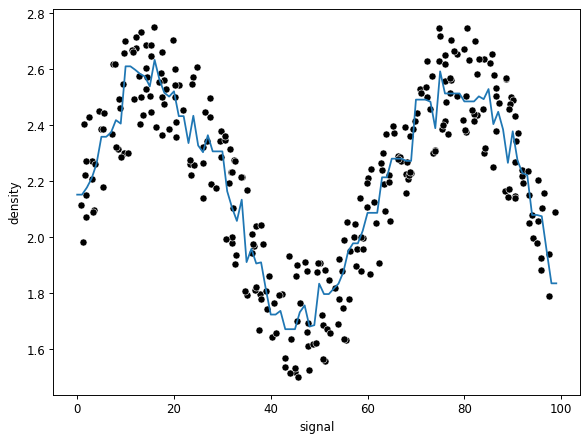

In [62]:
gbrt = GradientBoostingRegressor(n_estimators=77)
gbrt.fit(x_train, y_train)
run_model(gbrt,x_train,y_train,x_test,y_test)